
Author and owner: Fatma H. 

Dans ce notebook, je réalise une analyse statistique par régression linéaire et logistique, en utilisant les bibliothèques statistiques Python de base ainsi que des codes écrits manuellement. Le travail consiste à étudier les facteurs explicatifs du temps passé sur ordinateur et des facteurs influençant la probabilité d’achat de la nouvelle version d’un jeu vidéo. Les données proviennent d’un cours académique de statistique. 
L’échantillon contient les variables suivantes : l’âge, sexe, niveau de jeu , chômage ou pas , le temps de jeu, achat ou non de la nouvelle version ( variable New version)

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


#importer le fichier de données dans la lib pandas
bankxl3 = pd.read_excel(r'C:\..........xlsx')

#convertir les variables au type de variable appropié
bankxl3['Niveau'] = bankxl3['Niveau'].astype('category')
bankxl3['New_version'] = bankxl3['New_version'].astype('category')

#la variable dépendente New _version (recodée en variable binaire) = 1 si la personne achète la nouvele version du jeu (Oui), 0 sinon (Non).

bankxl3['New_version'] = bankxl3['New_version'].map({'Oui': 1, 'Non': 0})




In [10]:
bankxl3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Âge          312 non-null    int64   
 1   Sexe         312 non-null    int64   
 2   Niveau       312 non-null    category
 3   Chômage      312 non-null    int64   
 4   Temps        312 non-null    int64   
 5   New_version  312 non-null    category
dtypes: category(2), int64(4)
memory usage: 10.7 KB


**Modèle 1 : Variabilité du temps de jeu en fonction de la variable niveau du joueur**

**
Codification de la variable Niveau**: la variable Niveau aà 3 modalités (1= amateur, 2= intermédiaire, 3=
professionne.

l. o n retient la modalité 1 (amateur) comme catégorie de référence et crér  deux autre 
variables indicatrices suivtan:


-Intermédiaire = 1 si Niveau correspond à la modalité 2 (intermédiaire), 0non s
;
-Professionnel = 1 si Niveau correspond à la modalité 3 (professionnel), 0 sinon

varibles explicatives :'Âge', 'Sexe','Chômage'	Niveau, New_version

In [13]:
#regression lineaire du modèle 1
#définition des variables du modéle et transformation des variable catégorialles en binaires 


def Intermédiaire(value):
    if value == 2 :
        return 1 
    else :
        return 0    
bankxl3['Intermédiaire'] = bankxl3['Niveau'].map(Intermédiaire)

def Professionnel(value):
    if value == 3 :
        return 1 
    else :
        return 0    
bankxl3['Professionnel'] = bankxl3['Niveau'].map(Professionnel)
bankxl3.head()
#bankxl3.info()

#ajouter la constante aux variablex explicatives X

Y1 = bankxl3['Temps'] # Target variable]
X = bankxl3[['Intermédiaire', 'Professionnel']]

X = sm.add_constant(X)
X.head(1)



,const,Intermédiaire,Professionnel
0,1.0,0,0


In [14]:

model1 = sm.OLS(Y1, X)
model_result = model1.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Temps   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.759
Date:                Sat, 28 Jun 2025   Prob (F-statistic):             0.0649
Time:                        10:36:24   Log-Likelihood:                -973.13
No. Observations:                 312   AIC:                             1952.
Df Residuals:                     309   BIC:                             1963.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.1099      0.577     27.937


quation estimée du modèle : Temps= 16.11+ 1.212 * Intermédiaire -0.487 *Professionnel

Test de significativité globale du modèle:
Hypothèses confrontées :
H0: βIntermédiaire= βProfessionnel=0 
H1: au moins l'un des β est différent de zéro 

La P-value = 0.065> 0.05. On ne rejette pas 𝐻0. Au seuil de signification de 5%, le modèle 1 n’est pas globalement 
significatif

Estimation du temps de jeu moyen par semaines pour un joueur professionnel
Temps de jeu moyen estimé= 16.11+ 1.212 * 0 -0.487 *1 = 15.62 heures ( ≈ 15 heures et 37 min

In [17]:
#create new DataFrame
df_predict =pd.DataFrame({'Intermédiaire':[0], 
                          'Professionnel':[1]}) 
                                                 
df_predict = sm.add_constant(df_predict,has_constant='add')

#view new DataFrame
df_predict.head()

#predict Temps 
predres = model_result.predict(df_predict)
print(predres)
#model_result.predict(exog=dict(X=df_predict))

0    15.623188
dtype: float64


In [18]:
model_result.get_prediction(df_predict).summary_frame(alpha=0.05)  # alpha = significance level for confidence interval

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,15.623188,0.66223,14.320137,16.92624,4.721076,26.525301


Au seuil de confiance de 95%, on estime que le temps de jeu moyen d’un joueur professionnel se situe entre 
14.32 et 16.93 heures (entre 14 heures 19 min et 16 heures 55 min) par semaine.

Modèle 2 : Variabilité du temps de jeu en fonction des variables Age, Sexe, Chômage et Niveau

In [21]:
# variables du modéle et ajout de la constante aux variablex explicatives X

Y2 = bankxl3['Temps'] # Target variable]
X2 = bankxl3[['Âge', 'Sexe','Chômage', 'Intermédiaire', 'Professionnel']]
X2 = sm.add_constant(X2)
X2.head(1)


,const,Âge,Sexe,Chômage,Intermédiaire,Professionnel
0,1.0,46,0,0,0,0


In [22]:
model2 = sm.OLS(Y2, X2)
model_result2 = model2.fit()
print(model_result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Temps   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     8.373
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           1.95e-07
Time:                        10:36:26   Log-Likelihood:                -955.89
No. Observations:                 312   AIC:                             1924.
Df Residuals:                     306   BIC:                             1946.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            19.4517      2.399      8.109

Intervalle de prévision pour le temps de jeu
Au seuil de confiance de 95%, on estime que le nombre d’heures de jeu par semaine d’un homme de 40 ayant un 
niveau de jeu intermédiaire et qui n’est pas au chômage se situe entre 5.56 et 26.27 heures ( ≈ entre 5 heures 
33min et 26 heures 16min)

In [24]:

Xpred =pd.DataFrame({'Âge':[40], 'Sexe':[1],'Chômage':[0], 'Intermédiaire':[1], 
                          'Professionnel':[0]})                                                  
Xpred = sm.add_constant(Xpred,has_constant='add')

#view new DataFrame
Xpred.head()

,const,Âge,Sexe,Chômage,Intermédiaire,Professionnel
0,1.0,40,1,0,1,0


In [25]:
model_result2.get_prediction(Xpred).summary_frame(alpha=0.05)  # alpha = significance level for confidence interval


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,15.914298,0.578826,14.775315,17.053282,5.558947,26.269649


**Équation de régression estimée:**

$Temps = 19.452 - 0.052 Âge - 2.932 Sexe + 2.364 Chômage +1.459 Intermédiaire - 0.206 Professionnel$ 



**Significativité globale du modèle 2 :**

Hypothèses du test ∶ 

H0: βÂge = βSexe = βChômage = βIntermédiaire = βProfessionnel = 0

H1: au moins l′un des β est différent de zéro

La P-value du test F est < 0.05, on rejette H0. Au seuil de signification de 5%, le modèle 2 est globalement 
significatif . La régression explique 12% de la variabilité observée dans le temps de jeu.

**Effet des variables explicatives, selon le modèle 2**

La contribution individuelle de la variable i est testé par les hypothèses H0: βi = 0 vs H1: βi ≠ 0

**Le facteur âge**

𝜷̂Âge=-0.052 : on estime que lorsque l’âge augmente de 1 année, le temps de jeu moyen par semaine diminue
de 0.052heures (≈3 minutes), toute chose étant égale par ailleurs.
La P-value =0.313 > 0.05, au seuil de signification de 5%, l’âge ne contribue pas significativement à expliquer le temps que la personne passe sur le jeu.

**La variable Sexe**

𝜷̂Sexe = -2.932 : on estime que le temps de jeu moyen par semaine des femmes (Sexe=0) est supérieur de 2.932 
heures (≈ 2 ℎ𝑒𝑢𝑟𝑒𝑠 𝑒𝑡 56 𝑚𝑖𝑛) par rapport aux hommes (Sexe=1). Toute chose étant égale par ailleurs. 

La p-value < 0.05, on rejette H0 Au seuil de signification de 5%, la contribution individuelle de la variable Sexe est 
significative pour expliquer le temps que la personne passe sur le jeu.

**L’effet du facteur chômage** 

𝜷̂Chômage = 2.364 : on estime que le temps de jeu moyen par semaine d’une personne en chômage (chômage =1)
est supérieur de 2.364 heures ( ≈2 heures et 22 min) par rapport à une personne qui n’est pas en chômage. Toute
chose étant égale par ailleurs.

La p-value =0.003< 0.05. Au seuil de signification de 5%, le fait d’être en chômage ou non contribue de façon 
significative à expliquer le temps que la personne passe sur le jeu.



**L’effet de niveau du joueur :**

Temps = 19.452 - 0.052 Âge - 2.932 Sexe + 2.364 Chômage +1.459 Intermédiaire - 0.206 Professionnel 

Équation de régression estimée selon le niveau :

Si niveau =1 (amateur =1), $Temps = 19.452 - 0.052 Âge - 2.932 Sexe + 2.364 Chômage$

Si niveau =2 (Intermédiaire =1), $Temps = 19.452 +1.459 - 0.052 Âge - 2.932 Sexe + 2.364 Chômage$

Si niveau =3 (Professionnel =1), $Temps = 19.452 - 0.206 - 0.052 Âge - 2.932 Sexe + 2.364 Chômage$


𝜷̂𝐈𝐧𝐭𝐞𝐫𝐦é𝐝𝐢𝐚𝐢𝐫𝐞 = 𝟏. 𝟒𝟓𝟗

On estime qu’en moyenne le temps de jeu par semaine d’une personne ayant un niveau intermédiaire est
supérieur de 1.459 heures( ≈1h et 27 min) par rapport à une personne ayant un niveau amateur. Lorsque toute 
chose étant égale par ailleurs.

La p-value =0.037< 0.05. Au seuil de signification de 5%, la variable Intermédiaire contribue de façon significative 
à expliquer le temps de jeu.


𝜷̂𝐏𝐫𝐨𝐟𝐞𝐬𝐬𝐢𝐨𝐧𝐧𝐞𝐥 = -0.206

On estime que le temps de jeu moyen par semaine d’une personne ayant un niveau professionnel est inférieur de 
0.206 (≈ 12 min )par rapport à une personne ayant un niveau amateur. Toute chose étant égale par ailleurs 
La P-value =0.806 > 0.05, donc en rejette 𝐻0 . 

Au seuil de signification de 5%, La variable Professionnel ne contribue pas significativement à expliquer le temps passé sur le jeu. 



La constante =19.452 représente le temps moyen par semaine estimé lorsque toutes les autres variables sont 
nulles (i.e. lorsque la personne est une femme ayant un niveau amateur, d’âge zéro et qui n’est pas en chômage). 
Cette interprétation n’a pas de sens pratique à cause de l’âge zéro et considérée comme un cas d’extrapolation,
car l’âge minimum inclus dans l’échantillon utilisé pour estimer le modèle 2 est de 35 ans.
Au seuil de signification de 5%, la constante est significative (p-value < 0.05).    

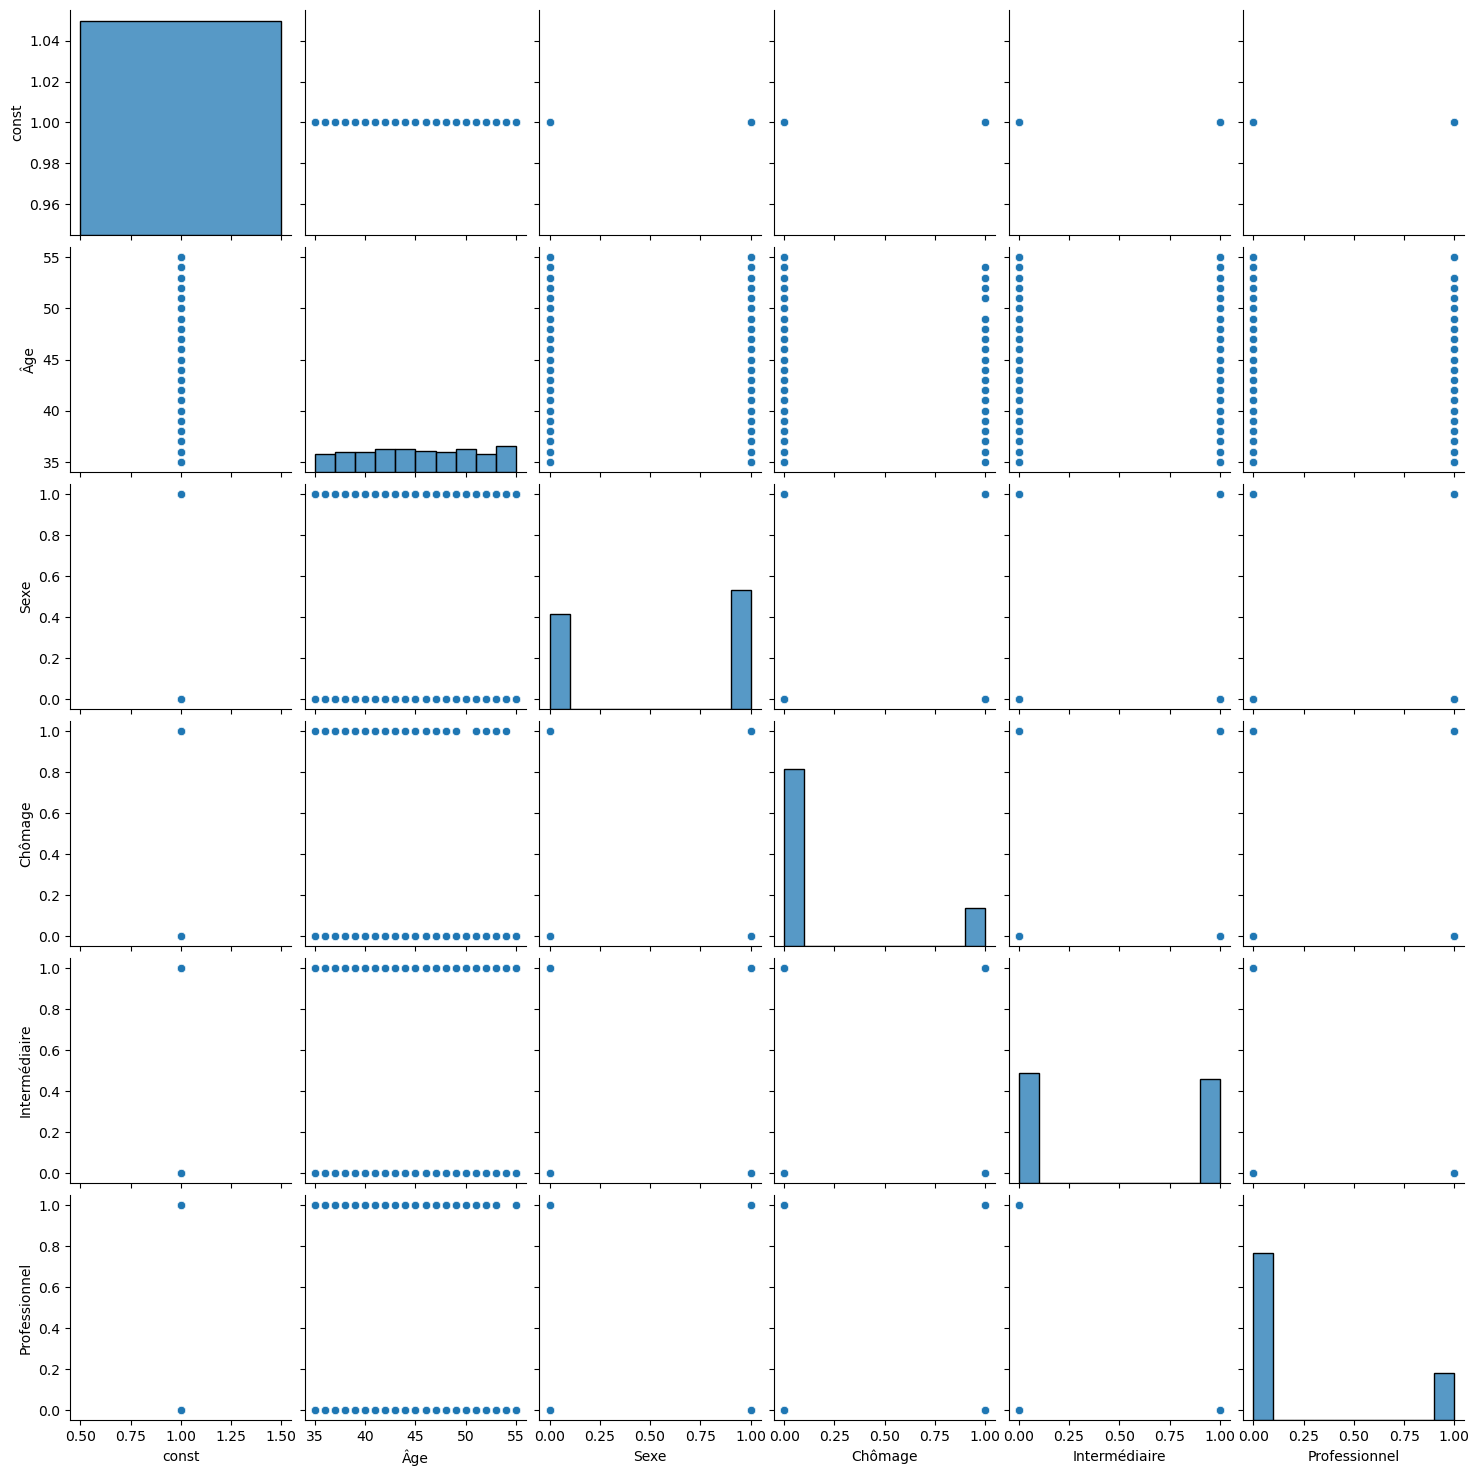

In [27]:
# multicolinearité graphyquement 
import seaborn as sns
sns.pairplot(X2);



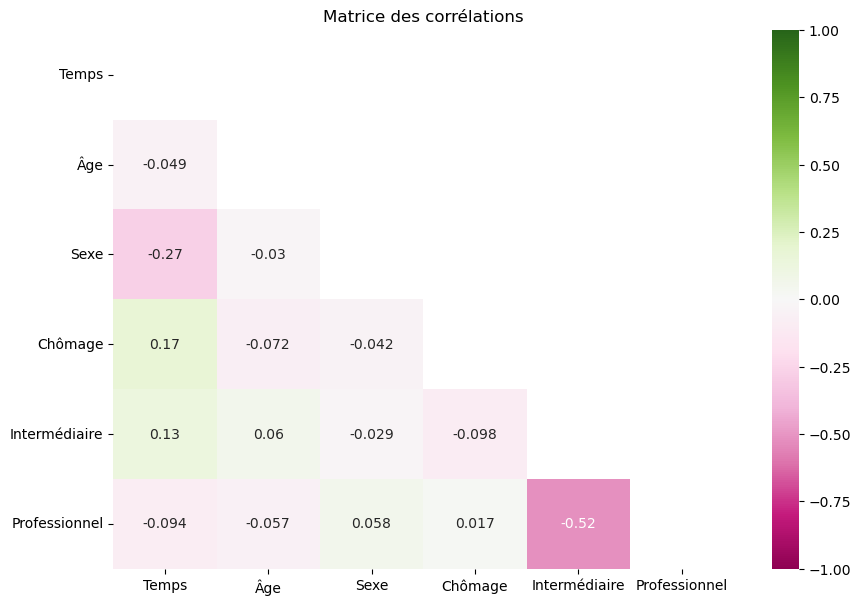

In [28]:
#matrice des corrélation avec représentation graphyque

# import libraries
import matplotlib.pyplot as plt

# sélectionner les variables à inclure dans la matrice
K = bankxl3[['Temps','Âge', 'Sexe','Chômage', 'Intermédiaire', 'Professionnel']]
# set figure size
plt.figure(figsize=(10,7))

# Pour montrer uniquement la partie inférieure de la matrice et  masquer la partie supérieure qui lui  y est identique, vu que la matrice des corréltions est symétrique
mask = np.triu(np.ones_like(K.corr(), dtype=bool))

# generate heatmap
sns.heatmap(K.corr(), annot=True, mask=mask, vmin=-1, vmax=1,cmap="PiYG")
plt.title('Matrice des corrélations')
plt.show()

In [29]:
#calcul des VIF pour tester la mulicolinéarité des variables explicatives

from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["Variables explicatives"] = X2.columns
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif.round(3)



,Variables explicatives,VIF Factor
0,const,65.621
1,Âge,1.010
2,Sexe,1.006
3,Chômage,1.018
4,Intermédiaire,1.385
5,Professionnel,1.376


Il ne semble pas y avoir un problème de multicolinéarité des variables explicatives, tous les VIF sont < 10.

C:\Users\monpc\AppData\Local\Temp\ipykernel_8588\730094552.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_result2.resid, fit=stats.norm);


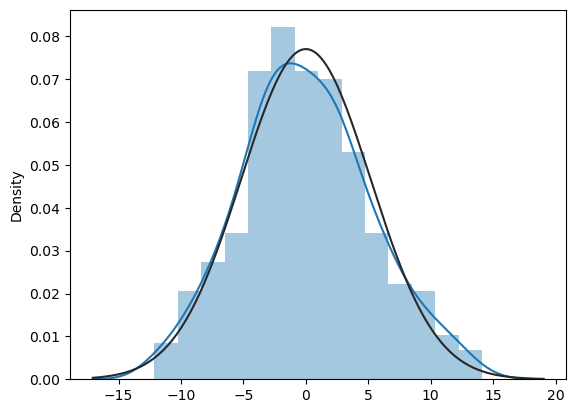

In [31]:
#diagnostique de l'autorrélation des erreurs

from scipy import stats
sns.distplot(model_result2.resid, fit=stats.norm);



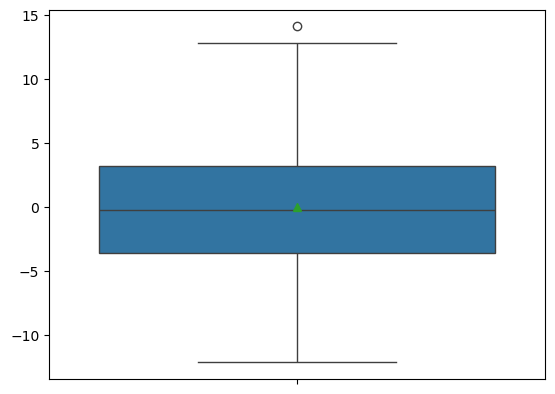

In [32]:
sns.boxplot(model_result2.resid, showmeans=True);

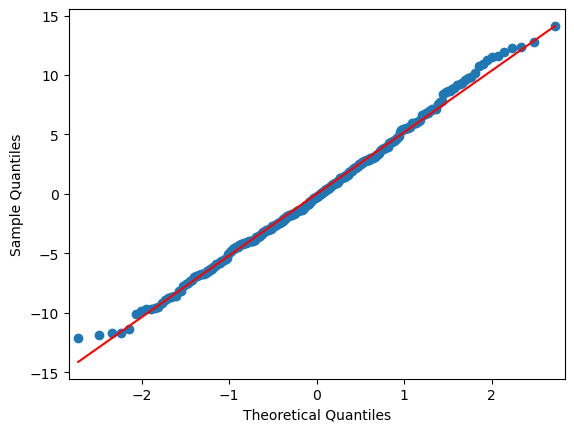

In [33]:
sm.qqplot(model_result2.resid, line='s');

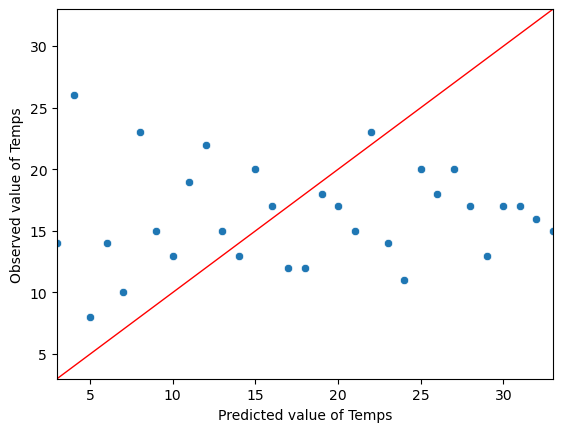

In [34]:


Y = bankxl3['Temps'] # Target variable]
Y_max = Y.max()
Y_min = Y.min()

ax = sns.scatterplot(data= Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Temps")
ax.set_ylabel("Observed value of Temps")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()



**Effet du niveau du joueur une fois que l’on contrôle pour l’âge, le sexe et le fait que la personne soit au chômage ou non**

On effectue une régression séquentielle de la variable temps sur deux blocs de variables explicatives. Le premier 
bloc est formé par les variables de contrôles âge, sexe et le fait que la personne soit au chômage ou non. Le 
deuxième bloc est constitué par la variable d’intérêt ‘Niveau’ du joueur, par l’intermédiaire des variables 
indicatrices Intermédiaire et Professionnel.


In [36]:
# I use open source lib HLR to process hierarchical lineaire regression

from HLR import HierarchicalLinearRegression


# Define the models for hierarchical regression including predictors for each model
X4 = { 1: ['Âge', 'Sexe','Chômage'], 
       2: ['Âge', 'Sexe','Chômage', 'Intermédiaire', 'Professionnel']}

# Define the outcome variable
y='Temps'

# Initiate the HLR object (missing_data and ols_params are optional parameters)
hreg = HierarchicalLinearRegression(bankxl3,X4, y)

# Generate a summarised report of HLR
print(hreg.summary())






   Model Level                                         Predictors  \
0            1                               [Âge, Sexe, Chômage]   
1            2  [Âge, Sexe, Chômage, Intermédiaire, Profession...   

   N (observations)  DF (residuals)  DF (model)  R-squared    F-value  \
0             312.0           308.0         3.0   0.100795  11.508247   
1             312.0           306.0         5.0   0.120344   8.372680   

    P-value (F)          SSR         SSTO  ...  MSE (total)  \
0  3.591208e-07  8558.008878  9517.304487  ...    30.602265   
1  1.948561e-07  8371.950479  9517.304487  ...    30.602265   

                                          Beta coefs  \
0  {'const': 19.853919374662965, 'Âge': -0.044318...   
1  {'const': 19.45166749909116, 'Âge': -0.0516163...   

                               P-values (beta coefs)  \
0  {'const': 2.0180476181331636e-15, 'Âge': 0.388...   
1  {'const': 1.2443579728459821e-14, 'Âge': 0.312...   

                                      Std Be

**Test F Change :**

Hypothèses confrontées : 

H0: βIntermédiaire= βProfessionnel=0 

H1: au moins l'un des β est différent de zéro

La p-value =0.035< 0.05, donc on rejette 𝐻0. Au seuil de signification de 5%, on conclut que l’effet du niveau du 
joueur est significatif une fois que l’on contrôle pour l’âge, le sexe et le fait que la personne soit au chômage ou 
non. L’augmentation marginale du 𝑅2(∆𝑅2 = 0.02 = 2%) est statistiquement significative. Après l’ajout de la 
variable Niveau, la proportion de la variabilité observée dans le temps de jeu qui est expliquée par le modèle de 
régression passe de 10.1% à 12%.

**Modèle 3 : régression logistique de la variable New_version sur les variables explicatives Sexe et le temps passé à jouer.**


**Codification des variables:**

Variable Sexe : catégorie de référence est Sexe =0 (Femme)

Variable dépendente New _version (recodée en variable binaire) = 1 si la personne achète la nouvele version du jeu (Oui), 0 sinon (Non).


In [39]:




#convertir les variables au type de variable appropié
bankxl3['Niveau'] = bankxl3['Niveau'].astype('category')
bankxl3['New_version'] = bankxl3['New_version'].astype('category')


#Variable dépendent New _version (recodée en variable binaire) = 1 si la personne achète la nouvele 
#Version du jeu (Oui), 0 sinon (Non)

bankxl3['New_version'] = bankxl3['New_version'].map({'Oui': 1, 'Non': 0})






In [40]:
# Spécifier la variable dependante W et les variables explicatives Z



W = bankxl3.New_version # Target variable
Z = bankxl3[['Sexe', 'Temps']] # independant variables
 
# on ajoute une colonne pour la constante
Z =sm.add_constant(Z)



In [41]:
#équation du modèle logistique dans la lib sm

model2 = sm.Logit(W, Z)
result = model2.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.582304
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            New_version   No. Observations:                  312
Model:                          Logit   Df Residuals:                      309
Method:                           MLE   Df Model:                            2
Date:                Sat, 28 Jun 2025   Pseudo R-squ.:               0.0003233
Time:                        10:39:50   Log-Likelihood:                -181.68
converged:                       True   LL-Null:                       -181.74
Covariance Type:            nonrobust   LLR p-value:                    0.9429
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8715      0.478      1.824      0.068      -0.065       1.808
Sexe          -0.0042      0.

Équation de la régression logistique estimée:

$𝑃̂ (New.Version)= 1/(1+ 𝑒−(0.871−0.004∗𝑆𝑒𝑥𝑒 +0.008∗𝑇𝑒𝑚𝑝𝑠))$

**Significativité globale du modèle 3:** On effectue le test de rapport de vraisemblance 

Hypothèses confrontées:

H0: aucune amélioration d'ajustement suite à l'ajout des variables Sexe et Temps 

H1: les variables Sexe et Temps contribuent à l'amélioration de l'ajustement du modèle

La p-value= 0.943 > 0.05, donc on ne rejette pas 𝐻0. Au seuil de signification de 5%, le modèle n’est pas 
globalement significatif, les variables Sexe et Temps ne contribuent pas significativement à l’amélioration de 
l’ajustement du modèle 3.
    
La variabilité observée, quant à l’achat ou non de la nouvelle version du jeu, qui est expliquée par le modèle3 est 
approximativement nulle (entre 0% et 0.1%)
    

In [44]:
# calculer les odds ratios, les IC et les stocker dans un dataframe du la lib pd

odds_ratios = pd.DataFrame(
    {
        "Odds ratios": result.params,
        "Lower CI": result.conf_int()[0],
        "Upper CI": result.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)

print(odds_ratios)

       Odds ratios  Lower CI  Upper CI
const     2.390394  0.937066  6.097735
Sexe      0.995829  0.589902  1.681088
Temps     1.007855  0.961388  1.056568


**Interprétation des estimations obtenues en termes de « Odds ratio »**

Au seuil de signification de 5%, les variables et constante ne sont pas significatives, puis les P-value > 0.05.

𝑩𝑺𝒆𝒙𝒆 = −𝟎. 𝟎𝟎𝟒 𝒆𝒕 𝑶𝒅𝒅𝒔 𝒓𝒂𝒕𝒊𝒐 = 𝟎. 𝟗𝟗𝟔 : on estime que la probabilité d’achat de la nouvelle version du jeu 
pour un homme diminue 0.4 % (1-0.996) par rapport à une femmes. Toute chose étant égale par ailleurs. 

La p-value = 0.988> 0.05. Au seuil de signification de 5%, la variable Sexe ne contribue pas à expliquer 
significativement la probabilité d’achat de la nouvelle version de jeu (en termes de IC, au seuil de confiance de 95%,
on estime que la vraie valeur de Odds ratio se situe entre 0.59 et 1.681)

𝑩𝑻𝒆𝒎𝒑𝒔 = 𝟎. 𝟎𝟎𝟖 𝒆𝒕 (𝐎𝐝𝐝𝐬 𝐫𝐚𝐭𝐢𝐨 = 𝟏. 𝟎𝟎𝟖) : on estime que si le nombre d’heures de jeu par semaine,
augmente de 1 heure, la probabilité d’achat de la nouvelle version augmente de 0.8 %, (1.008-1), toute chose étant égale par ailleurs. 

Au seuil de signification de 5%, la variable Temps ne contribue pas significativement à expliquer la probabilité 
d’achat de la nouvelle version de jeu, puisque la P-value =0.745> 0.05 (en termes de IC, au seuil de confiance de 
95%, on estime que la vraie valeur de Odds ratio se situe entre 0.961 et 1.057)

**Pouvoir discriminant du modèle 3**

Taux de bonne classification est de 73.1% (le taux de mauvaise classification est de 26.9%).

Le modèle ne classe pas correctement les vrais négatifs (taux de 0%) et classe correctement tous les vrais positifs (taux de 100%)


In [47]:
matrice = result.pred_table(threshold=0.5)
matrice

array([[  0.,  84.],
       [  0., 228.]])

Text(0.5, 269.55555555555554, 'Predicted New_version')

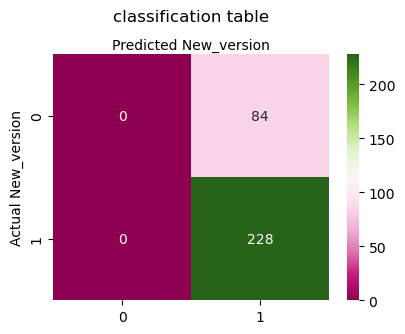

In [48]:

#présentation graphique de la lable de classification
class_names=[0,1] # name  of classes

fig, ax = plt.subplots(figsize=(4,3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrice), annot=True, cmap="PiYG" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('classification table', y=1.1)
plt.ylabel('Actual New_version')
plt.xlabel('Predicted New_version')


***Autres Méthodes pour calculer la table de classification***


In [50]:
# calcul de la matrice par la lib sklearn
from sklearn import metrics

#create confusion matrix

y_actual= W

y_predicted= result.predict(Z)
#prediction = map(round, y_predicted))

#creations des variables binaires
def y_pred(value):
    if value >= 0.5 :
        return 1 
    else :
        return 0    
y_predicted = y_predicted.map(y_pred)
#print( y_predicted)

c_matrix = metrics.confusion_matrix(y_actual, y_predicted)

print ('Confusion matrix')
print(c_matrix)

print ('Accuracy of model')
print(metrics.accuracy_score(y_actual, y_predicted))


print('Precision value of model')
print(metrics.precision_score(y_actual, y_predicted))


print ('Recall value of model')
print(metrics.recall_score(y_actual, y_predicted))





Confusion matrix
[[  0  84]
 [  0 228]]
Accuracy of model
0.7307692307692307
Precision value of model
0.7307692307692307
Recall value of model
1.0


In [51]:
# 2 eme méthode pour calculer la table de la classification dans la lib Sklearn

#sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')


from sklearn.metrics import classification_report
y_true = W
y_pred = y_predicted
target_names = ['0', '1']
print(classification_report(y_true, y_pred, target_names=target_names,))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.73      1.00      0.84       228

    accuracy                           0.73       312
   macro avg       0.37      0.50      0.42       312
weighted avg       0.53      0.73      0.62       312



C:\Users\monpc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\monpc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\monpc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Note : 

Accuracy: Percentage of correct predictions

Precision: Correct positive predictions relative to total positive predictions

Recall: Correct positive predictions relative to total actual positives